Importing the Libraries


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Reading the data 

In [ ]:
df=pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

Understanding the data


In [ ]:
df.head()

Getting to know the data and the data types

In [ ]:
df.info()

Getting the know the count null values 

In [ ]:
df.isnull().sum()

Plotting the graph of the null values

In [ ]:
sns.heatmap(df.isnull())

Getting the stastical knowledge of the data for analysing the data 

In [ ]:
df.describe()

Filled the NaN values with the mean score

In [ ]:
df.bmi.fillna(df.bmi.mean(),inplace=True)

Checking for reamining Null Values

In [ ]:
df.isnull().sum()

In [ ]:
sns.heatmap(df.isnull())

Getting to know the columns 

In [ ]:
df.columns

Getting the knowledge of unique values in each column

In [ ]:
df.gender.unique()

In [ ]:
df.ever_married.unique()

In [ ]:
df.work_type.unique()

In [ ]:
df.Residence_type.unique()

In [ ]:
df.smoking_status.unique()

Replacing the **Unknown** value in Smoking the column with NaN

In [ ]:
df.smoking_status = df.smoking_status.replace({"Unknown": df.smoking_status.mode()[0]})

In [ ]:
df.smoking_status.unique()

In [ ]:
df.info()

Label Encoding the Data 

Label Encoding - Handling Categorical Data 
This approach is very simple and it involves converting each value in a column to a number. Consider a dataset of bridges having a column names bridge-types having below values. Though there will be many more columns in the dataset, to understand label-encoding, we will focus on one categorical column only.

Consider we have column values like: <br>
Arch <br>
Beam <br>
Truss </br>
Cantilever <br>
Tied Arch <br>
Suspension <br>
Cable 

<img src="https://miro.medium.com/max/289/1*VinegxkUYMzik9GpucWCFA.png">


We choose to encode the text values by putting a running sequence for each text values like below:
With this, we completed the label-encoding of variable bridge-type. That’s all label encoding is about. But depending upon the data values and type of data, label encoding induces a new problem since it uses number sequencing. The problem using the number is that they introduce relation/comparison between them. Apparently, there is no relation between various bridge type, but when looking at the number, one might think that ‘Cable’ bridge type has higher precedence over ‘Arch’ bridge type. The algorithm might misunderstand that data has some kind of hierarchy/order 0 < 1 < 2 … < 6 and might give 6X more weight to ‘Cable’ in calculation then than ‘Arch’ bridge type.

Let’s consider another column named ‘Safety Level’. Performing label encoding of this column also induces order/precedence in number, but in the right way. Here the numerical order does not look out-of-box and it makes sense if the algorithm interprets safety order 0 < 1 < 2 < 3 < 4 i.e. none < low < medium < high < very high.

<img src="https://miro.medium.com/max/294/1*KdCvKnI9ATVPiozmuRindA.png">

In [ ]:
label_encoder = preprocessing.LabelEncoder() 
df['gender']= label_encoder.fit_transform(df['gender'])
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
df['work_type']= label_encoder.fit_transform(df['work_type'])
df['Residence_type']= label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])

In [ ]:
df.head()

Plotting the Correlation Matrix Graph

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(df.corr(),annot=True, linewidths=.5, ax=ax)

Deleting the ID Column

In [ ]:
del df['id']

In [ ]:
df.head()

In [ ]:
X = df.iloc[:,0:10]  #independent columns
y = df.iloc[:,-1]

In [ ]:
X

Getting the Most Realted Features using Chi Square 

The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable. The test calculates a statistic that has a chi-squared distribution, named for the Greek capital letter Chi (X) pronounced “ki” as in kite.
We try to test the likelihood of test data(sample data) to find out whether the observed distribution of data set is a statistical fluke(due to chance ) or not. “Goodness of fit” statistic in the chi-square test, measures how well the observed distribution of data fits with the distribution that is expected if the variables are independent.

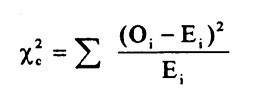

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Parameters','Score']  #naming the dataframe columns
featureScores

In [ ]:
print(featureScores.nlargest(5,'Score'))

In [ ]:
df=df[['age','avg_glucose_level','heart_disease','hypertension','smoking_status']]
df.head()

Splitting the Data Into Train and Test Split Data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('smoking_status',axis=1),df['smoking_status'],test_size=0.30,random_state=101)

Building the Multiclass Logistic Model

In [ ]:
logmodel=LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [ ]:
logmodel.fit(X_train,y_train)

Getting the Predictions

In [ ]:
predictions=logmodel.predict(X_test)

In [ ]:
for i in predictions:
    print(i)

Calculating the accuracy of the model

In [ ]:
accuracy=accuracy_score(y_test,predictions)
accuracy*100

Getting the Classification Report 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))